# Linear Regression from Scratch using NumPy

In this notebook, we implement **Linear Regression from scratch using NumPy**.  
The goal is to understand how machine learning models work *under the hood*, without using high-level libraries such as scikit-learn or PyTorch.

We focus on:
- Data representation using NumPy arrays
- The mathematical model of linear regression
- The loss function and its gradient
- Why vectorized (matrix-based) computation is preferred over loops

---

## 1. Data Representation in Machine Learning

In machine learning, input data is represented as a **design matrix**:

$$
X \in \mathbb{R}^{n \times d}
$$

- $n$: number of samples  
- $d$: number of features

Even if we have **only one feature**, we still represent the data as a **2D matrix**.

### Why do we use `X` with shape `(100, 1)` instead of `(100,)`?

- `(100,)` is a **1D array**, which has no explicit notion of rows and columns.
- `(100, 1)` is a **2D matrix**, meaning:
  - 100 samples (rows)
  - 1 feature (column)

Using `(n, d)`:
- Matches mathematical notation
- Avoids ambiguous broadcasting
- Scales naturally to multiple features
- Is consistent with ML libraries and frameworks

**Rule of thumb:**  
> In machine learning, data is always treated as a 2D matrix, even if there is only one feature.

---

## 2. Linear Regression Model

The linear regression model is:

$$
y = \theta_0 + \theta_1 x
$$

- $\theta_0$: bias (intercept)  
- $\theta_1$: weight (slope)

In matrix form:

$$
\hat{y} = X_b \theta
$$

---

## 3. Why Do We Add a Bias Term?

To include the bias $\theta_0$ in matrix form, we augment the input matrix with a column of ones:

$$
X_b =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$

Without this column:
- The model would be forced to pass through the origin $(0, 0)$
- The intercept (bias) could not be learned

**Key intuition:**  
> The bias is just a weight multiplied by 1.

---

## 4. Loss Function: Mean Squared Error (MSE)

We measure how well the model fits the data using Mean Squared Error:

$$
\mathcal{L}(\theta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

where $\hat{y} = X_b\theta$.

---

## 5. Gradient of the Loss Function

The gradient of the MSE with respect to $\theta$ is:

$$
\nabla_\theta \mathcal{L}
= \frac{2}{n} X_b^T (X_b \theta - y)
$$

---

## 6. Gradient Descent Optimization

We update the parameters using gradient descent:

$$
\theta \leftarrow \theta - \eta \, \nabla_\theta \mathcal{L}
$$

- $\eta$: learning rate  
- Repeat for many iterations

---

## 7. Why Use Matrix Operations Instead of Loops?

In NumPy, we avoid Python loops and use **vectorized matrix operations** because:
- NumPy operations run in optimized C code
- Vectorization is faster and more readable
- It matches the math directly
- It scales better

For example, predictions can be computed as:

```python
y_hat = X_b @ theta


In [ ]:
# ============================================================
# Example 1: Linear Regression from Scratch (Student Template)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# Fix random seed for reproducibility
np.random.seed(0)

# ------------------------------------------------------------
# Step 1: Generate synthetic data
# ------------------------------------------------------------
# TODO:
# 1. Create X with shape (100, 1), values in [0, 1)
# 2. Create y using the model: y = 3x + 2 + Gaussian noise

X = ...
y = ...

# ------------------------------------------------------------
# Step 2: Add bias term
# ------------------------------------------------------------
# TODO:
# Create X_b with shape (100, 2)
# - First column: ones (bias)
# - Second column: X

X_b = ...

# ------------------------------------------------------------
# Step 3: Initialize parameters
# ------------------------------------------------------------
# TODO:
# Initialize theta with correct shape

theta = ...

# Learning rate
learning_rate = 0.1

# Number of samples
n = len(X_b)

# ------------------------------------------------------------
# Step 4: Gradient Descent
# ------------------------------------------------------------
for step in range(1000):
    # TODO:
    # 1. Compute predictions
    # 2. Compute gradients of MSE
    # 3. Update theta using gradient descent

    predictions = ...
    gradients = ...
    theta = ...

# ------------------------------------------------------------
# Step 5: Inspect learned parameters
# ------------------------------------------------------------
print("Learned theta:", theta)

# ------------------------------------------------------------
# Step 6: Visualization
# ------------------------------------------------------------
# TODO:
# 1. Scatter plot of the data
# 2. Plot the learned regression line



plt.title("Linear Regression with NumPy")
plt.show()


TypeError: object of type 'ellipsis' has no len()

Learned theta:
 [[2.11107725]
 [2.96846414]]


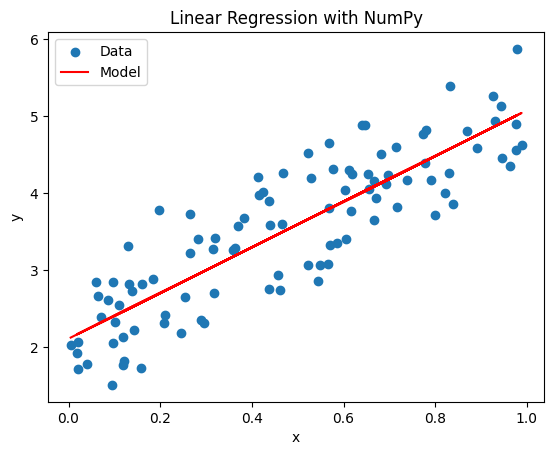

In [1]:
# ============================================================
# Example 1: Linear Regression from Scratch (Solution)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# Fix random seed so results are reproducible
np.random.seed(0)

# ------------------------------------------------------------
# Step 1: Generate synthetic data
# ------------------------------------------------------------

# X: 100 samples, 1 feature (2D matrix, not 1D vector)
X = np.random.rand(100, 1)

# y = 3x + 2 + noise
# - 3: true slope
# - 2: true intercept
# - Gaussian noise adds realism
y = 3 * X + 2 + np.random.randn(100, 1) * 0.5

# ------------------------------------------------------------
# Step 2: Add bias term
# ------------------------------------------------------------

# Add a column of ones to X to learn the intercept (bias)
# X_b shape: (100, 2)
# Column 0 → bias (1)
# Column 1 → feature x
X_b = np.hstack((np.ones((100, 1)), X))

# ------------------------------------------------------------
# Step 3: Initialize parameters
# ------------------------------------------------------------

# theta contains:
# theta[0] → bias
# theta[1] → weight
# Shape must match number of columns in X_b
theta = np.random.randn(2, 1)

# Learning rate controls step size in gradient descent
learning_rate = 0.1

# Number of training samples
n = len(X_b)

# ------------------------------------------------------------
# Step 4: Gradient Descent
# ------------------------------------------------------------

for step in range(1000):
    # Compute predictions: y_hat = X_b @ theta
    predictions = X_b @ theta

    # Compute gradient of Mean Squared Error
    # Formula: (2/n) * X_b^T (X_b theta - y)
    gradients = (2 / n) * X_b.T @ (predictions - y)

    # Update parameters using gradient descent
    theta = theta - learning_rate * gradients

# ------------------------------------------------------------
# Step 5: Inspect learned parameters
# ------------------------------------------------------------

# Should be close to:
# theta[0] ≈ 2 (bias)
# theta[1] ≈ 3 (slope)
print("Learned theta:\n", theta)

# ------------------------------------------------------------
# Step 6: Visualization
# ------------------------------------------------------------

# Plot original data points
plt.scatter(X, y, label="Data")

# Plot learned regression line
plt.plot(X, X_b @ theta, color="red", label="Model")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with NumPy")
plt.legend()
plt.show()
